In [59]:
import tkinter
from tkinter import filedialog
import os
import pandas as pd

root = tkinter.Tk()
root.withdraw() #use to hide tkinter window

currdir = os.getcwd()
df = pd.read_csv (r"C:\Users\shrey\Downloads\LFP-20211020T075747Z-001\LFP\20degC LFP.csv")

from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [60]:
import numpy as np
from sklearn.impute import SimpleImputer

imputer= SimpleImputer(fill_value=np.nan,strategy='mean')
data = imputer.fit_transform(df)
x = data[:,[0,2,3]]
y = data[:,1]

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=5)
poly_variables = poly.fit_transform(x)

poly_var_train, poly_var_test, res_train, res_test = train_test_split(poly_variables, y, test_size = 0.2, random_state = 4)

regression = linear_model.LinearRegression()

model = regression.fit(poly_var_train, res_train)
score = model.score(poly_var_test, res_test)

In [62]:
y_pred =  abs(regression.predict(poly_variables))
from sklearn.metrics import r2_score, mean_squared_error,explained_variance_score,mean_absolute_error
print("R2 Score:" + str(r2_score(y,y_pred)))
print("Variance Score:" + str(explained_variance_score(y,y_pred)))
print("Mean Squared Error:" + str(mean_squared_error(y,y_pred)))
print("Mean Absolute Error:" + str(mean_absolute_error(y,y_pred)))

R2 Score:0.9996286309343672
Variance Score:0.9996291632552408
Mean Squared Error:0.34706475676878956
Mean Absolute Error:0.4304375258142224


In [65]:
y_pred
k = np.ceil(y_pred.all()>100)

In [52]:
df = pd.DataFrame(y_pred)
df.to_csv('25degLFP.csv')

In [53]:
degree = [10,15,20,25,30]
r2score = []
mse = []

In [54]:
r2score.append(r2_score(y,y_pred))
mse.append(mean_squared_error(y,y_pred))

In [55]:
r2score

[0.9999985088079325]

In [56]:
mse

[0.0014894892182064725]

In [57]:
X = data[:,0]
Y = data[:,3]
Z = y_pred

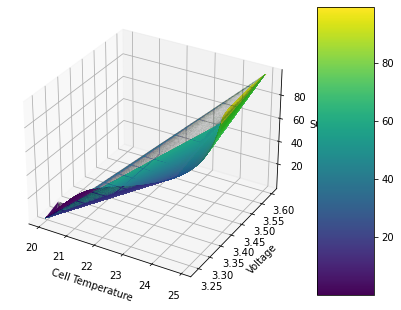

In [58]:
fig = plt.figure()
ax = Axes3D(fig)
surf=ax.plot_trisurf(X,Y,Z, cmap=plt.cm.viridis, linewidth=0.2)
ax.set_xlabel('Cell Temperature')
ax.set_ylabel('Voltage')
ax.set_zlabel('SOC')
fig.colorbar( surf, shrink=1.0, aspect=5)
plt.show()

ValueError: x and y must have same first dimension, but have shapes (5,) and (1,)

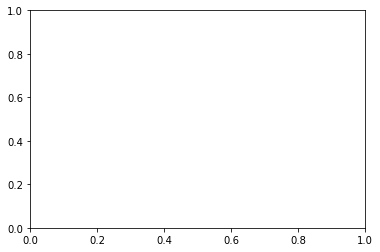

In [44]:
fig = plt.figure()
ax = plt.axes()
ax.bar(degree, mse);
ax.set_xlabel('Temperature')
ax.set_ylabel('MSE')

ValueError: x and y must have same first dimension, but have shapes (5,) and (1,)

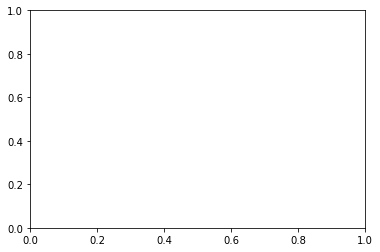

In [48]:
fig = plt.figure()
ax = plt.axes()
ax.bar(degree, r2score);
ax.set_xlabel('Degree')
ax.set_ylabel('R2 Score')